In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [2]:
data = pd.read_csv("/content/drive/MyDrive/tobigs/bacteria.csv")

In [3]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


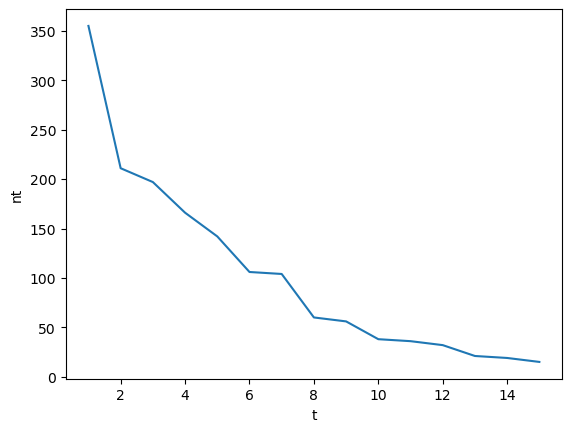

In [4]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [5]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

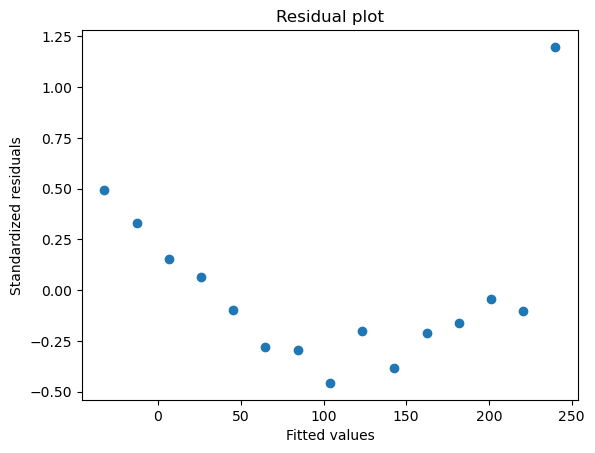

In [6]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

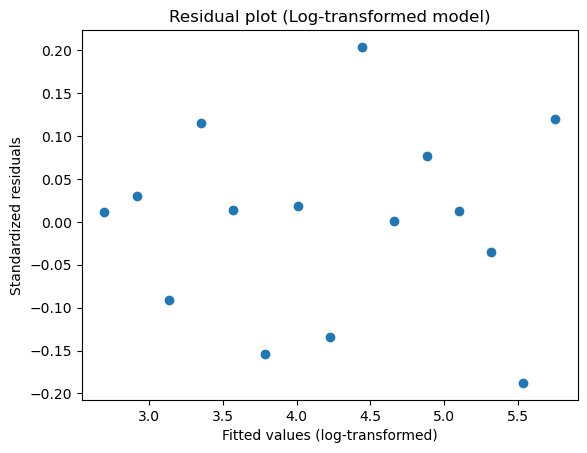

In [7]:
# ans :
import numpy as np
import statsmodels.api as sm

# Log transformation
data['log_nt'] = np.log(data['nt'])

# Fit linear regression model
model_log = sm.OLS(data['log_nt'], sm.add_constant(data['t'])).fit()

# Predict values and calculate standardized residuals
fitted_values_log = model_log.predict(sm.add_constant(data['t']))
standardized_residuals_log = (data['log_nt'] - fitted_values_log) / data['log_nt'].std()

# Plot residuals
plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted values (log-transformed)')
plt.ylabel('Standardized residuals')
plt.title('Residual plot (Log-transformed model)')
plt.show()

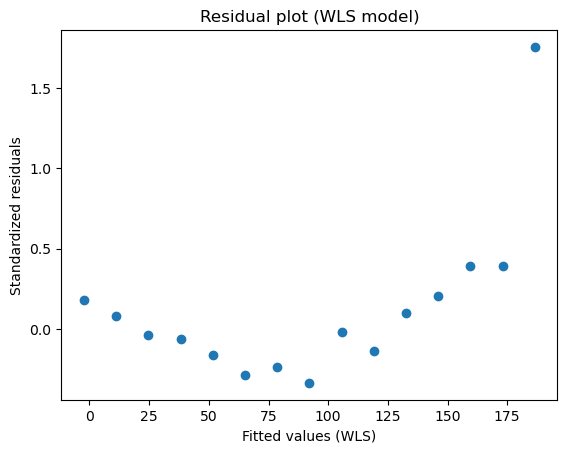

In [8]:
# WLS regression
weights = 1 / data['nt']
model_wls = sm.WLS(data['nt'], sm.add_constant(data['t']), weights=weights).fit()

# Predict values and calculate standardized residuals
fitted_values_wls = model_wls.predict(sm.add_constant(data['t']))
standardized_residuals_wls = (data['nt'] - fitted_values_wls) / data['nt'].std()

# Plot residuals
plt.scatter(fitted_values_wls, standardized_residuals_wls)
plt.xlabel('Fitted values (WLS)')
plt.ylabel('Standardized residuals')
plt.title('Residual plot (WLS model)')
plt.show()

### Q2

In [9]:
# 데이터 로드
data2 = pd.read_csv("/content/drive/MyDrive/tobigs/artificial1.csv")

In [10]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [11]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [12]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        23:27:16   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

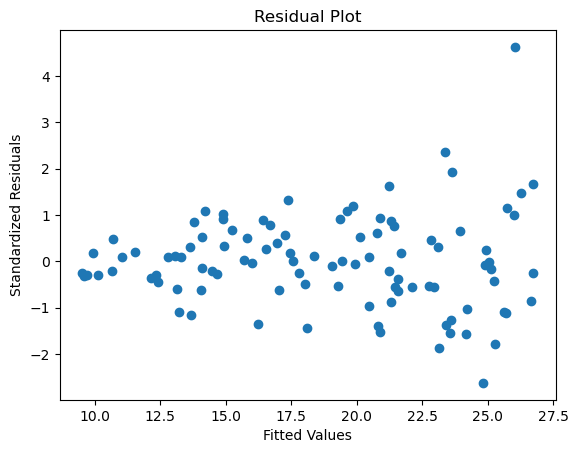

In [13]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     29.53
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           4.02e-07
Time:                        23:37:26   Log-Likelihood:                -66.210
No. Observations:                 100   AIC:                             136.4
Df Residuals:                      98   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1335      0.132     16.143      0.0

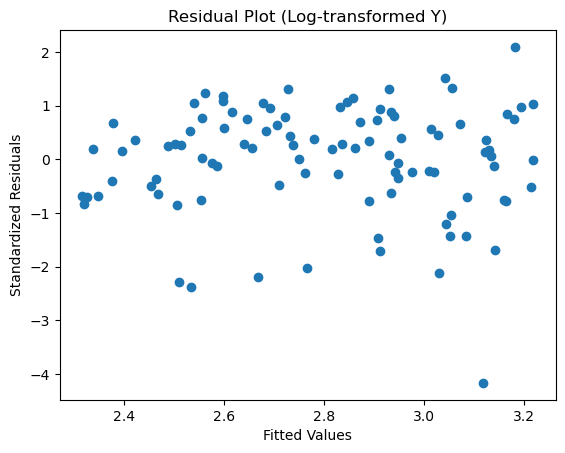

In [14]:
# ans :

# Log transformation
data2['log_Y'] = np.log(data2['Y'])

# Fit linear regression
result2 = smf.ols('log_Y ~ X', data=data2).fit()

# Plot residuals
fitted_values_log = result2.predict()
standardized_residuals_log = result2.get_influence().resid_studentized_internal
print(result2.summary())

plt.scatter(fitted_values_log, standardized_residuals_log)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot (Log-transformed Y)')
plt.show()

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 

Simple Linear Regression Model에서 heteroscedasticity가 문제되는 이유

(1) OLS 추정치의 효율성이 감소하여 standard error가 잘못 추정됨

(2) t-test, F-test 등 통계 값 신뢰 불가

(3) model evaluation 결과 지표 왜곡
